# Data Analysis and Vis, HW 5
*Adapted from COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: July 11

In this homework, you will use classification methods to classify handwritten digits (Part 1) and predict the popularity of online news (Part 2). We hope these exercises will give you an idea of the broad usage of classificaiton methods. 

In [1]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Part1: MNIST handwritten digits

THE MNIST handwritten digit dataset consists of images of handwritten digits, together with labels indicating which digit is in each image. You will see that images are just matrices with scalar values, and that we can use all the classifcation algorithms we studied on them.  We saw these in class when we looked at clustering methods.

Becaue both the features and the labels are present in this dataset (and labels for large datasets are generally difficult/expensive to obtain), this dataset is frequently used as a benchmark to compare various classification methods. 
For example, [this webpage](http://yann.lecun.com/exdb/mnist/) gives a comparison of a variety of different classification methods on MNIST (Note that the tests on this website are for higher resolution images than we'll use.) 

In this problem, we'll use scikit-learn to compare classification methods on the MNIST dataset. 

There are several versions of the MNIST dataset. We'll use the one that is built-into scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

* Classes: 10 (one for each digit)
* Samples total: 1797
* Samples per class: $\approx$180
* Dimensionality: 64 (8 pixels by 8 pixels)
* Features: integers 0-16 (grayscale value; 0 is white, 16 is black)

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

Note that we will scale the data before running them through our algorithms, which will also alter their appearance when we plot them. You can read details about scaling and why it's important [here](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling).

In [2]:
digits = load_digits()
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


In [3]:
# this is what one digit (a zero) looks like
print("===\nThe raw data")
print(digits.images[0])
print("===\nThe scaled data")
print(X[0])
print("===\nThe digit")
print(digits.target[0])

===
The raw data
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
===
The scaled data
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.75743581 -0.20978513 -

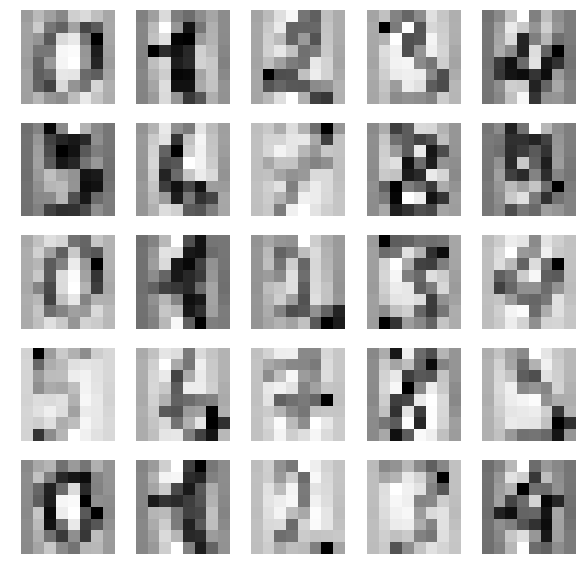

In [4]:
plt.figure(figsize= (10, 10))    
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()

You might find [this webpage](http://scikit-learn.org/stable/tutorial/basic/tutorial.html) helpful. 

### Task 1.1: Classification with Support Vector Machines (SVM)

1. Split the data into a training and test set using the command 
```
train_test_split(X, y, random_state=1, test_size=0.8)
```
+ Use SVM with an `rbf` kernel and parameter `C=100` to build a classifier using the *training dataset*.
+ Using the *test dataset*, evaluate the accuracy of the model. Again using the *test dataset*, compute the confusion matrix. What is the most common mistake that the classifier makes? 
+ Print all of these misclassified digits as images. 
+ Using the 'cross_val_score' function, evaluate the accuracy of the SVM for 100 different values of the parameter C between 1 and 500. What is the best value? 
+ Try to train and test the algorithm on the raw (non-scaled) data. What's your accuracy score?

In [5]:
#1
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.8)
#2
model = svm.SVC(kernel='rbf',C=100)
model.fit(x_train, y_train)
#3
print('Confusion Matrix:')
y_pred = model.predict(x_test)
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 140   4   0   0   0   0   1   4   0]
 [  0   1 134   0   0   0   0   2   5   0]
 [  0   0   3 136   0   0   0   3   4   1]
 [  0   0   0   0 140   0   0  12   0   0]
 [  0   0   0   0   0 141   1   0   1   4]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   4   0   1   0   1   0   1 126   0]
 [  0   2   0   2   0   3   1   2   2 140]]
Accuracy =  0.952712100139082


[16, 60, 84, 112, 169, 176, 203, 210, 225, 248, 249, 284, 298, 347, 361, 385, 387, 394, 400, 439, 462, 487, 523, 528, 533, 537, 540, 545, 576, 591, 635, 648, 683, 721, 726, 735, 738, 755, 757, 782, 785, 799, 891, 932, 957, 971, 999, 1032, 1040, 1085, 1089, 1090, 1108, 1120, 1149, 1198, 1217, 1230, 1255, 1273, 1283, 1342, 1346, 1356, 1363, 1371, 1394, 1395]


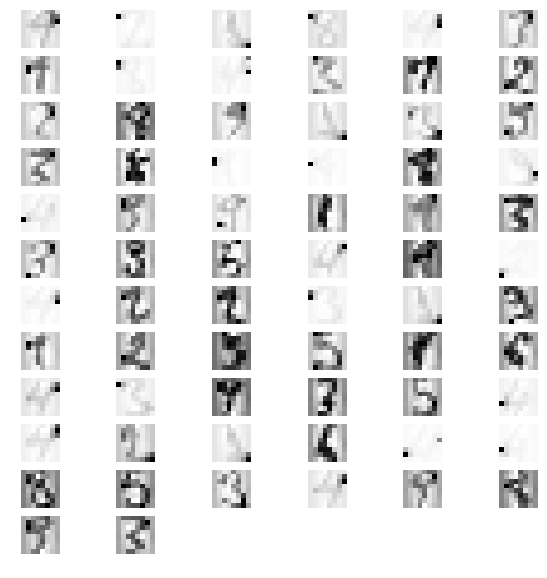

In [6]:
#4 From part of SVM notes.

misclassified = [x for x in range(len(y_test)) if (y_pred[x] != y_test[x])]
rows = np.ceil(len(misclassified)/6)
print(misclassified)
plt.figure(figsize= (10, 10))    
for index, misindex in enumerate(misclassified):
    plt.subplot(rows, 6, index+1)
    plt.imshow(np.reshape(x_test[misindex],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()

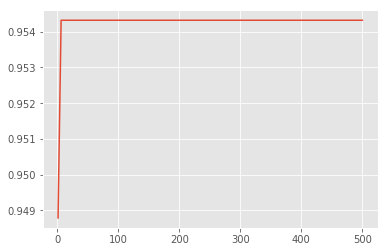

In [7]:
#5
Cs = np.linspace(1,500,100)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs): 
    model2 = svm.SVC(kernel='rbf', C = C)
    scores = cross_val_score(estimator = model2, X = X, y = y, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
        
plt.plot(Cs,Accuracies)
plt.show()

In [8]:
#6
x_train, x_test, y_train, y_test = train_test_split(digits.data,digits.target, random_state=1, test_size=0.8)
model = svm.SVC(kernel='rbf',C=100)
model.fit(x_train, y_train)

print('Confusion Matrix:')
y_pred = model.predict(x_test)
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [131  18   0   0   0   0   0   0   0   0]
 [140   0   2   0   0   0   0   0   0   0]
 [147   0   0   0   0   0   0   0   0   0]
 [152   0   0   0   0   0   0   0   0   0]
 [147   0   0   0   0   0   0   0   0   0]
 [139   0   0   0   0   0   7   0   0   0]
 [128   0   0   0   0   0   0  12   0   0]
 [132   0   0   0   0   0   0   0   1   0]
 [152   0   0   0   0   0   0   0   0   0]]
Accuracy =  0.11821974965229486


**Your Interpretation**: 
3. The most common mistake is thinking a '4' is a '7'. 7 is most frequently predicted of all the other digits when the digit is actually something else.
5. The best value appears to be around 6 or 11. Anything greater works well too. C doesn't do anything for us in this data set. Our accuracy's essentially the same across the board.
6. Using the raw data my accuracy's about 12%.

### Task 1.2: Prediction with k-nearest neighbors
Repeat task 1.1 using k-nearest neighbors (k-NN). In part 1, use k=10. In part 3, find the best value of k. 

In [9]:
# set up the model, k-NN classification with k = 10
#1
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.8)
k = 10
#2
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(x_train, y_train)

#3
print('Confusion Matrix:')
y_pred = clf.predict(x_test)
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 137  11   0   0   0   0   0   1   0]
 [  2   4 123   2   0   0   0   2   9   0]
 [  1   0   1 133   0   1   0   6   4   1]
 [  0   0   0   0 147   0   0   4   1   0]
 [  1   1   0   2   1 136   1   0   0   5]
 [  0   2   0   0   0   0 143   0   1   0]
 [  0   0   0   0   0   0   0 139   1   0]
 [  0   9   1   6   0   0   0   1 115   1]
 [  5  10   0   5   1   3   2   9   8 109]]
Accuracy =  0.9123783031988874


[16, 25, 74, 77, 80, 102, 112, 138, 169, 171, 172, 176, 178, 185, 193, 210, 214, 225, 251, 262, 269, 284, 288, 298, 325, 337, 347, 353, 361, 385, 387, 392, 394, 396, 400, 426, 434, 441, 462, 473, 504, 511, 523, 528, 535, 537, 540, 555, 565, 576, 600, 619, 635, 648, 683, 687, 694, 697, 701, 708, 726, 730, 735, 742, 748, 757, 763, 768, 778, 791, 793, 796, 798, 799, 801, 811, 821, 829, 834, 857, 860, 882, 932, 937, 957, 958, 971, 976, 979, 1004, 1022, 1032, 1044, 1089, 1090, 1091, 1095, 1096, 1105, 1108, 1121, 1130, 1149, 1154, 1158, 1161, 1194, 1206, 1221, 1230, 1260, 1266, 1282, 1283, 1294, 1318, 1320, 1336, 1342, 1363, 1371, 1376, 1388, 1392, 1394, 1396]


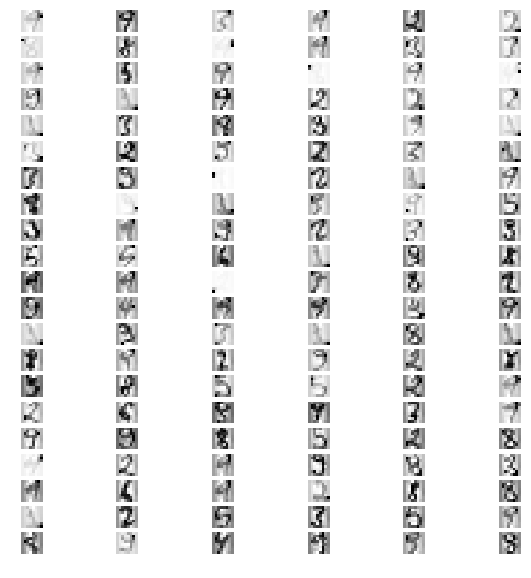

In [10]:
#4

misclassified = [x for x in range(len(y_test)) if (y_pred[x] != y_test[x])]
rows = np.ceil(len(misclassified)/6)
print(misclassified)
plt.figure(figsize= (10, 10))    
for index, misindex in enumerate(misclassified):
    plt.subplot(rows, 6, index+1)
    plt.imshow(np.reshape(x_test[misindex],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()

Best:  6.0


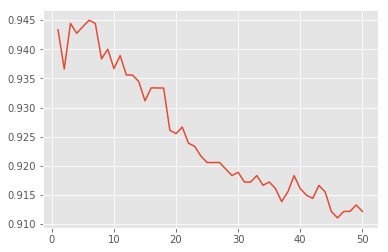

In [11]:
#5
Ks = np.linspace(1,50, 50)
Accuracies = np.zeros(Ks.shape[0])
for i,K in enumerate(Ks): 
    model2 = KNeighborsClassifier(n_neighbors=int(K))
    scores = cross_val_score(estimator = model2, X = X, y = y, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
        
best = Ks[np.argmax(Accuracies)]
print("Best: ", best)

plt.plot(Ks,Accuracies)
plt.show()

In [12]:
#6
x_train, x_test, y_train, y_test = train_test_split(digits.data,digits.target, random_state=1, test_size=0.8)
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(x_train, y_train)

print('Confusion Matrix:')
y_pred = model.predict(x_test)
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [131  18   0   0   0   0   0   0   0   0]
 [140   0   2   0   0   0   0   0   0   0]
 [147   0   0   0   0   0   0   0   0   0]
 [152   0   0   0   0   0   0   0   0   0]
 [147   0   0   0   0   0   0   0   0   0]
 [139   0   0   0   0   0   7   0   0   0]
 [128   0   0   0   0   0   0  12   0   0]
 [132   0   0   0   0   0   0   0   1   0]
 [152   0   0   0   0   0   0   0   0   0]]
Accuracy =  0.11821974965229486


**Your Interpretation**:
3. The most common mistake is thinking a 9 is a 7. 7 is most frequently predicted of all the other digits when the digit is actually something else.
5. The best value for k is 6.
6. The accuracy using the raw data is about 12%. It's equally as terrible as using the raw data with SVMs.

# Part 2: Popularity of online news

For this problem, you will use classification tools to predict the popularity of online news based on attributes such as the length of the article, the number of images, the day of the week that the article was published, and some variables related to the content of the article. You can learn details about the datasetat the
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). 
This dataset was first used in the following conference paper: 

K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. *Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence* (2015).

The dataset contains variables describing 39,644 articles published between January 7, 2013 and Januyary 7, 2015 on the news website, [Mashable](http://mashable.com/). 
There are 61 variables associated with each article. Of these, 58 are *predictor* variables, 2 are variables that we will not use (url and timedelta), and finally the number of shares of each article. The number of shares is what we will use to define whether or not the article was *popular*, which is what we will try to predict. You should read about the predictor variables in the file *OnlineNewsPopularity.names*. Further details about the collection and processing of the articles can be found in the conference paper. 


### Task 2.1 Import the data 
* Use the pandas.read_csv() function to import the dataset.
* To us[scikit-learn](http://scikit-learn.org), we'll need to save the data as a numpy array. Use the *DataFrame.as_matrix()* command to export the predictor variables as a numpy array called *X* this array should not include our target variable (the number of shares). We don't need the url and timedelta, so let's drop these columns. 
* Export the number of shares as a separate numpy array, called *shares*. We'll define an article to be popular if it received more shares than the median number of shares. Create a binary numpy array, *y*, which indicates whether or not each article is popular.

In [13]:
# Note the data and description are in the OnlineNewsPopularity directory
news_table = pd.read_csv("OnlineNewsPopularity.csv")
df_cols = news_table.drop(columns=['url', ' timedelta', ' shares'])
df = scale(pd.DataFrame.as_matrix(df_cols))
shares = np.array(news_table[' shares'])


### Task 2.2 Exploratory data analysis 

First check to see if the values are reasonable. What are the min, median, and maximum number of shares? 

In [14]:
print("min: ", shares.min())
shares_median = np.median(shares)
print("median: ", np.median(shares))
print("max: ", shares.max())

min:  1
median:  1400.0
max:  843300


### Task 2.3 Classification using k-NN

Develop a k-NN classification model for the data. Use cross validation to choose the best value of k. What is the best accuracy you can obtain on the test data? 

In [15]:
is_popular = [True if(x > shares_median) else False for x in shares ]


Best:  120.0


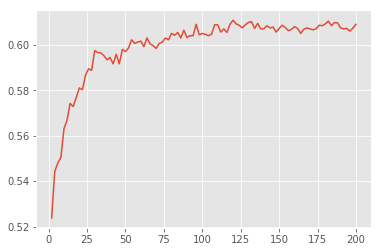

In [16]:
Ks = np.linspace(2,200,100)
Accuracies = np.zeros(Ks.shape[0])
for i,K in enumerate(Ks): 
    model3 = KNeighborsClassifier(n_neighbors=int(K))
    scores = cross_val_score(estimator = model3, X = df[:5000], y = is_popular[:5000], cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
        
best = Ks[np.argmax(Accuracies)]
print("Best: ", best)

plt.plot(Ks,Accuracies)
plt.show()

**Interpretation:** 
current best: 120 neighbors provides the best accuracy. Though, starting around 80, the accuracy begins to level of and stops improving noticeably.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(df, is_popular, random_state=1, test_size=0.8)
k = 120

clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(x_train, y_train)

print('Confusion Matrix:')
y_pred = clf.predict(x_test)
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Confusion Matrix:
[[11798  4173]
 [ 7614  8131]]
Accuracy =  0.6283579265985623


We get an accuracy of about 63% with 120 neighbors.

### Task 2.4 Classification using SVM

Develop a support vector machine classification model for the data. 
 
 * SVM is computationally expensive, so start by using only a fraction of the data, say 5,000 articles. 
 * Experimt with different Cs. Which is the best value for C?

Note that it takes multiple minutes per value of C to run on the whole dataset!

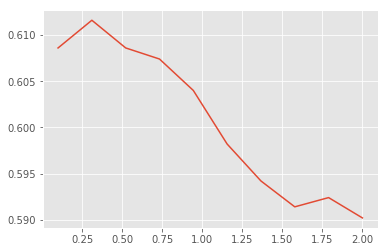

In [18]:
Cs = np.linspace(.1,2,10)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs): 
    model4 = svm.SVC(kernel='rbf', C = C)
    scores = cross_val_score(estimator = model4, X = df[:5000], y = is_popular[:5000], cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
        
plt.plot(Cs,Accuracies)
plt.show()

~.3 is the best value for C. I originally tested with values from 1 to 100 and saw that there were diminishing returns as C increased. So, I narrowed the possible values of C down drastically (.1 to 2) and tested again.

In [19]:
x_train, x_test, y_train, y_test = train_test_split(df, is_popular, random_state=1, test_size=0.8)

model = svm.SVC(kernel='rbf',C=0.3)
model.fit(x_train, y_train)

print('Confusion Matrix:')
y_pred = model.predict(x_test)
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Confusion Matrix:
[[10782  5189]
 [ 6075  9670]]
Accuracy =  0.6448480262328162


We get an accuracy of about 64% with a C of 0.3.

### Task 2.5 Classification using decision trees

Develop a decision tree classification model for the data. 

Use cross validation to choose good values of the max tree depth (*max_depth*) and minimum samples split (*min_samples_split*). 

In [20]:
depths = [i+1 for i in range(30)]
splits = [i+2 for i in range(30)]

best_combo = [0,0]
curr_best_acc = 0.0
for d in depths:
    for s in splits:
        model5 = tree.DecisionTreeClassifier(max_depth = d, min_samples_split = s)
        scores = cross_val_score(estimator = model5, X = df[:5000], y = is_popular[:5000], cv=5, scoring='accuracy')    
        if(scores.mean() > curr_best_acc):
            best_combo = [d, s]
            curr_best_acc = scores.mean()
print(best_combo[0], ", ", best_combo[1])

5 ,  2


In [21]:
x_train, x_test, y_train, y_test = train_test_split(df, is_popular, random_state=1, test_size=0.8)

model = tree.DecisionTreeClassifier(max_depth = best_combo[0], min_samples_split = best_combo[1])
model.fit(x_train, y_train)

print('Confusion Matrix:')
y_pred = model.predict(x_test)
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Confusion Matrix:
[[10947  5024]
 [ 6628  9117]]
Accuracy =  0.6326144532727961


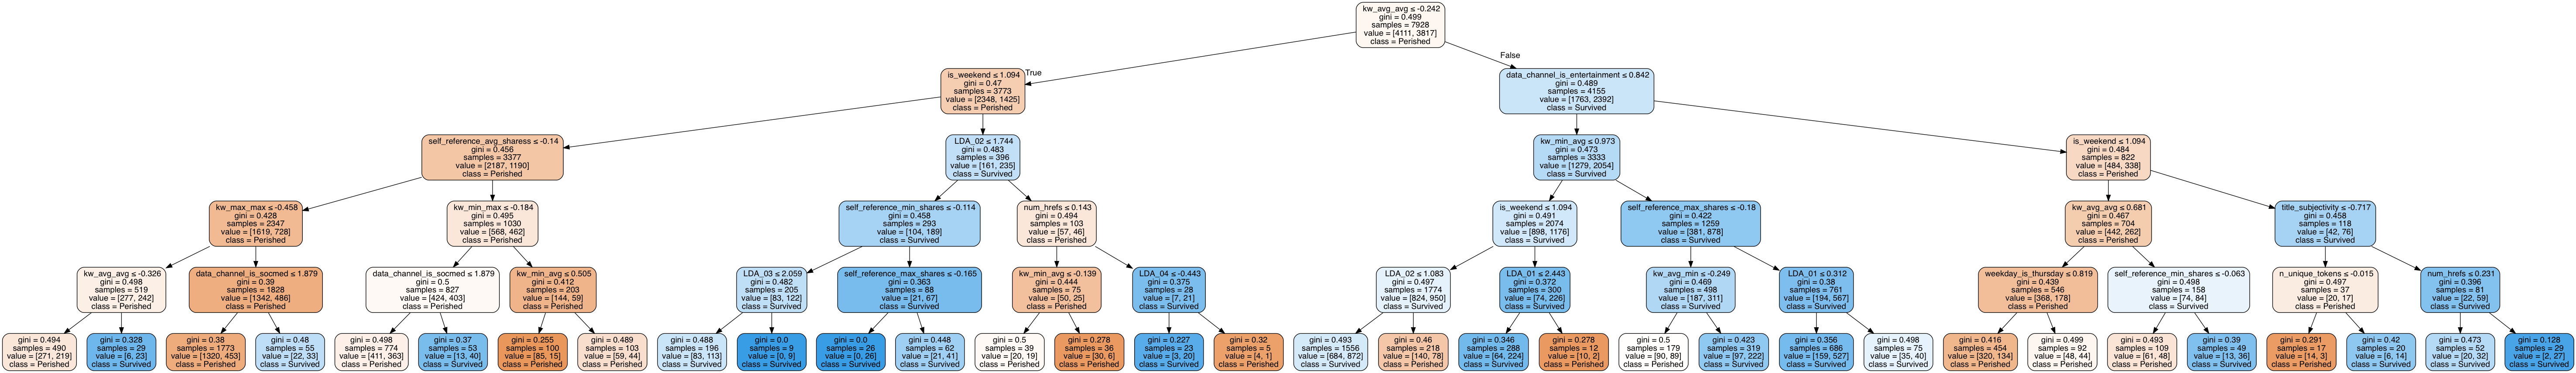

In [22]:
import pydotplus 
from IPython.display import Image, display  

def renderTree(my_tree, features):
    # hacky solution of writing to files and reading again
    # necessary due to library bugs
    filename = "temp.dot"
    with open(filename, 'w') as f:
        f = tree.export_graphviz(my_tree, 
                                 out_file=f, 
                                 feature_names=features, 
                                 class_names=["Perished", "Survived"],  
                                 filled=True, 
                                 rounded=True,
                                 special_characters=True)
  
    dot_data = ""
    with open(filename, 'r') as f:
        dot_data = f.read()

    graph = pydotplus.graph_from_dot_data(dot_data)
    image_name = "temp.png"
    graph.write_png(image_name)  
    display(Image(filename=image_name))
renderTree(model, df_cols.columns)

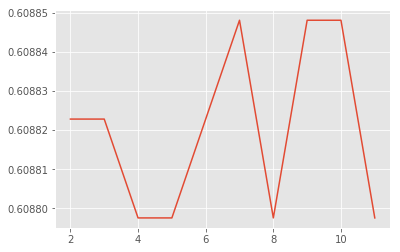

In [23]:
splits = np.linspace(2, 11, 10)
Accuracies = np.zeros(splits.shape[0])
for i,s in enumerate(splits):
    model5 = tree.DecisionTreeClassifier(max_depth = best_combo[0], min_samples_split = int(s))
    scores = cross_val_score(estimator = model5, X = df, y = is_popular, cv=5, scoring='accuracy')   
    Accuracies[i]  = scores.mean()
        
plt.plot(splits,Accuracies)
plt.show()

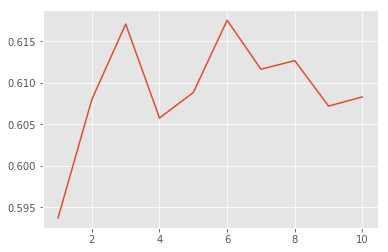

In [24]:
depths = np.linspace(1, 10, 10)
Accuracies = np.zeros(depths.shape[0])
for i,d in enumerate(depths):
    model5 = tree.DecisionTreeClassifier(max_depth = d, min_samples_split = best_combo[1])
    scores = cross_val_score(estimator = model5, X = df, y = is_popular, cv=5, scoring='accuracy')   
    Accuracies[i]  = scores.mean()
        
plt.plot(depths,Accuracies)
plt.show()

### Task 2.6 Describe your findings
1. Which method (k-NN, SVM, Decision Tree) worked best?
+ How did different parameters influence the accuracy?
+ Which model is easiest do interpret?
+ How would you interpret your results?


**Your Solution:**
1. The best method was SVM. It provided the highest accuracy. (64.4%)
2. Increasing the number of neighbors, k, increases accuracy as a general rule, smaller Cs increased the accuracy of SVM as a general rule, and it's difficult to tell with depth and splits for a decision tree. Increased depth seemed to tend towards increasing accuracy as increasing splits was unpredictable.
3. The decision tree is easiest to interpret since there's an associated visual that translates naturally to human understanding. I'd say KNN comes in a close second.
4. All methods provide a popularity prediction that's just good enough for its prediction to be significant, better than a coin flip, but by no means impressive. The main influencer in popularity is probably not included in the current dataset. Evaluating basic NLP features doesn't seem to be great in determining the popularity of an article. (If we're comparing this to reading handwriting, which we did in part 1, this is terrible. The baseline for reading a digit is better than one in ten and we were getting accuracies upwards of 90%)